In [1]:
from IPython.display import Image

# SVM 

## Introducción

SVM por sus siglas significa Support Vector Machine, un modelo linear que fue creado principalmente para clasificacion aunque hay algunas alteraciones o adiciones que lo vuelven util para problemas de regresion. 

La forma en la que SVM funciona es por definir una linea o un hiperplano el cual separa el universo de la data entre sus clases. 

Para describir la idea detras de SVM vamos a ejemplificarlo a continuacion.

Supongamos que nuestro set de entramiento contiene dos clases, los puntos rojos son una clase y los puntos azules son la otro clase.

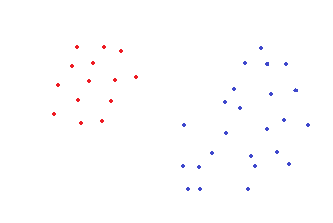

In [4]:
Image('svm_dataset.png')

A simple vista podemos separar las dos clases dibujando una linea que separe de forma correcta las dos clases, asi como la siguiente imagen.

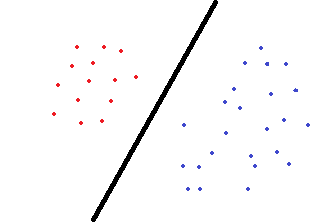

In [6]:
Image('svm_dataset_divided.png')

Pero para separar las dos clases a continuacion se muestra una gran cantidad de posibles lineas que pueden separar las clases, todas correctas, pero cual es la mejor?

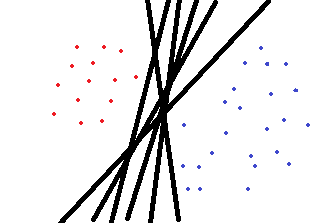

In [8]:
Image('svm_dataset_divided_multi.png')

Cualquiera de las lineas anterior separa correctamente las dos clases, pero entonces cual debemos elegir? Bueno para dar una solucion mas definitiva y que esta sea la cual separe las clases de una forma mas generalizada es que usamos SVM.

## Hipótesis de SVM

Para SVM la hipotesis se define de una forma directa, ya que estamos interesados en encontrar el hiperplano que separe las clases entonces

\begin{equation}
w^T X >= 0; -> 1
\end{equation}
\begin{equation}
w^T X < 0; -> 0
\end{equation}

Con estos definimos que todo punto que se encuentre arriba del hiperplano expresado por \begin{equation}w^T X \end{equation} debe ser clasificado como la clase 1 y todo debajo de este hiperplano como clase 0. 

Un punto de la hipotesis es que esta se debe centarr en la mera distancia que existe entre cada punto de las clases y este hiperplano.

## Función de costo

Ya que tenemos en mente que las predicciones se daran a partir de las formulas anteriormente mencionadas en la hipotesis, la funcion de perdida de SVM esta compuesta de dos componentes, uno por clase.

Cuando un punto pertenece a la clase 1 entonces la perdida es
\begin{equation}
-yPerdida(y, prediccion)
\end{equation}
, cuando el punto pertenece a la clase 0 entonces la perdida es
\begin{equation}
(1-y)Perdida(y, prediccion)
\end{equation}



## Algoritmo de aprendizaje/entrenamiento

La forma en la que funciona el algoritmo de SVM es por medio de encontrar los puntos de cada clase que estan mas cerca de una linea que separe las clases. A estos puntos los llamamos vectores de soporte.

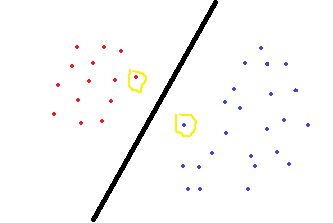

In [9]:
Image('svm_vectors.png')

Luego se calcula la distancia que se encuentra entre la linea que separa las claes y los puntos mas proximos a la linea o como ya los definimos, vectorres de soporte. A esta distancia la llamamos margen y el fin principal de SVM es maximizar el margen.

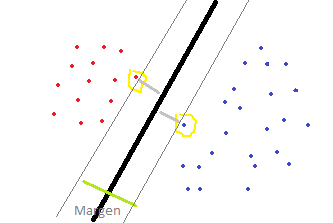

In [11]:
Image('svm_margin.png')

## Propiedades, similitudes, diferencias ,ventajas y desventajas sobre otros algoritmos y modelos.

SVM es un algoritmo que en si hace lo que mucho algoritmos hacen como uno de sus pasos, por ejemplo en decision trees tenemos que cada nodo del arbol separa clases por medio de una linea obviamente no con el hecho de maximizar el margen entre las clases como lo hace SVM pero es muy similar entre los algortimos de Machine Learning que son para Clasificar.

SVM tiene muchos puntos para jugar como lo son los kernels que se explicaran a continuacion, cuenta con regularizacion ademas de que la tecnica de cross validation es muy util cuando nuestro hyperplano no puede separar de forma perfecta las clases, entonces este tiene que asumir un error el cual puede ajustarse por medio de Cross Validation.

Las ventajas de SVM es que funciona muy bien con datasets de tamanos pequeños, es un algoritmo relativamente sencillo o eficiente con pequeña cantidad de datos.

Las desventajas es que cuando crece el dataset el algoritmo se vuelve muy tardado e ineficiente. Es un algoritmo que se ve muy afectado cuando hay datos "outliers" o con casos extraños como que un punto del dataset que pertecene a la clase 1 se encuentre en el mismo espacio de los puntos de la clase 2. En este caso SVM sufre cierto error, pero es cuando si hay una cantidad considerable de estos.

## Kernel-trick

De las cosas mas poderozas sino la mas poderoza de SVM son los kernels, como lo vimos en la definicion de SVM, su funcion es encontrar aquella frontera que divida a las clases y lo mas simple es por medio de un hyperplano, osea una funcion lineal, SVM tambien ofrece diferentes funciones para separar las clases, se pueden separar por fronteras descritas por funciones polinomiales. A estas funciones llamamos Kernels.

Las funciones mas basicas o kernels mas basicos en SVM son:

* Lineales
Como lo mencionabamos antes la frontera de decision estaria definida por una funcion lineal, vease como una linea o un hiperplano dependiendo de la dimensionalidad de los datos.
* Polinomiales
Los kernels polinomiales nos permiten definir fronteras de decision mas flexiles, asi como lo son en las regresiones polinomiales que entre mayor es el grado de polinomios mayor ajuste se tendra, en este caso mayor flexibilidad tendra la frontera de decision con respecto a la forma que mejor separa las clases.
* Gaussianos
El kernel Gausianos son de los preferidos, este es un kernel que funciona muy bien con data no lineal y se tiene fama de poder separar bien las clases en general incluso cuando no se tiene mucho conocimiento de la forma de la informacion.
* Sigmoid


## Ejercicio en Codigo

A continuacion se describira un ejemplo en codigo de como aplicar SVM a un problema ded clasificacion sencillo utilizando Scikit Learn.


A continuacion se describen dos clases:
Clase 1: Azul
Clase 2: Anaranjado

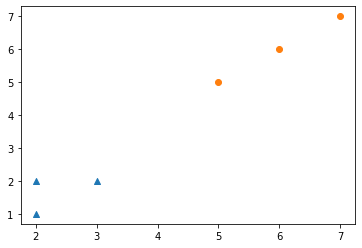

In [53]:
import numpy as np
import matplotlib.pyplot as plt

clase1 = np.array([[3, 2], [2, 1], [2, 2]])
clase2 = np.array([[5, 1], [7, 3], [6, 2]])

X = np.array([[3, 2], [2, 1], [2, 2], [5, 1], [7, 3], [6, 2]])
y = np.array([[0], [0], [0], [1], [1], [1]])

plt.scatter(clase1[:, 0], clase1[:, 1], marker='^')
plt.scatter(clase2[:, 0], clase2[:, 0], marker='o')

xx, yy = np.meshgrid(np.arange(0, 8, .02), np.arange(0, 4, .02))

A continuacion creamos 3 modelos SVM utilizando diferentes Kernels con la intencion de mostrar como estos separan las clase segun sus funciones

In [75]:
from sklearn.svm import SVC

svc = SVC(kernel='linear').fit(X, y)
rdf = SVC(kernel='rbf', gamma=0.7).fit(X, y)
poly = SVC(kernel='poly', degree=3).fit(X, y)

C:\Users\Ricar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ricar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Ricar\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


La siguiente grafica muestar como se veria un SVM con un kernel lineal

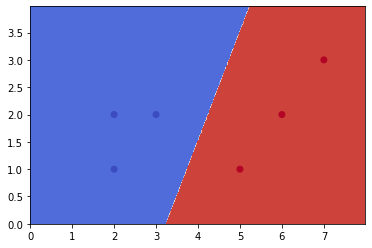

In [72]:
frontera = svc.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, frontera, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

Como podemos observar la frontera de decision o la frontera que divide a las dos clases tiene la forma de una funcion lineal.

A continuacion veremos como un SVM con kernel Gaussiano separa las clases.

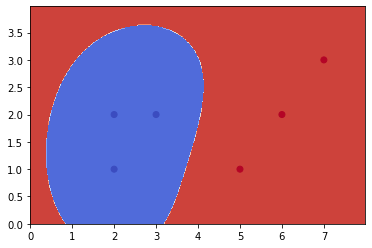

In [73]:
frontera = rbf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, frontera, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()

Finalmente veremos como el kernel polinomial actual sobre las dos clases

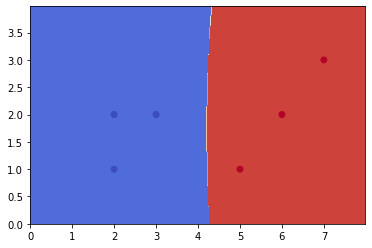

In [74]:
frontera = poly.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, frontera, cmap=plt.cm.coolwarm)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.show()